In [3]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 MB 27.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 31.5 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 33.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 35.9 MB/s eta 0:00:00


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1411.5232 - val_loss: 1809.9071
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1284.6730 - val_loss: 1795.8943
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1294.7538 - val_loss: 1784.6089
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1277.0623 - val_loss: 1772.2781
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1338.3756 - val_loss: 1756.8005
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1399.7809 - val_loss: 1737.5354
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1229.6697 - val_loss: 1710.2430
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1324.2415 - val_loss: 1675.5039
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1474.8239 - val_loss: 1632.3213
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1299.8806 - val_loss: 1579.3430
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1338.5376 - val_loss: 1507.8557
Epoch 12/50
9/9 ━━━━━━━━━━━━━━

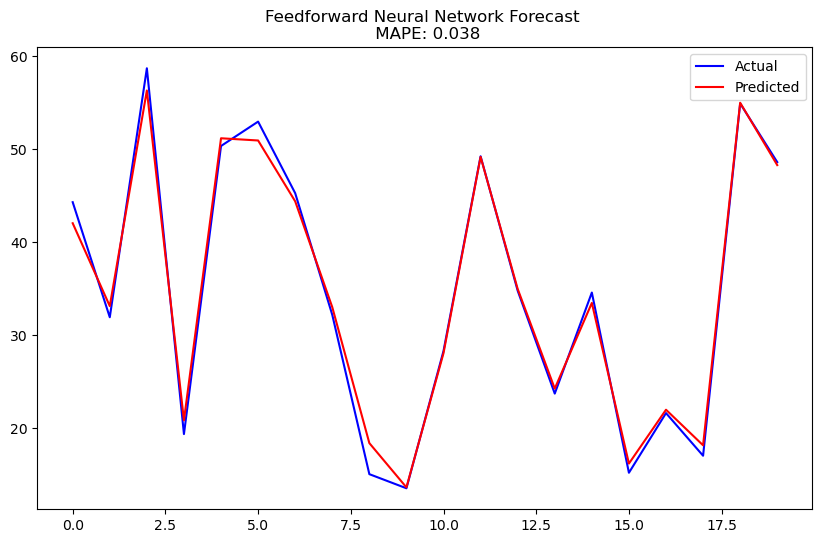

In [34]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Generate synthetic data
np.random.seed(42)
time = np.arange(100)
data = 10 + 0.5 * time + np.sin(0.2 * time) + np.random.normal(scale=1.0, size=100)

# Create lagged features
def create_features(data, lag=3):
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:i + lag])
        y.append(data[i + lag])
    return np.array(X), np.array(y)

lag = 3
X, y = create_features(data, lag=lag)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a simple feedforward neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(lag,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, validation_split=0.1)

# Evaluate and predict
y_pred = model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='Blue')
plt.plot(y_pred, label='Predicted', color='Red')
plt.title(f'Feedforward Neural Network Forecast \n MAPE: {mape:.3f}')
plt.legend()
plt.savefig("NN_forecast.png")
plt.show()

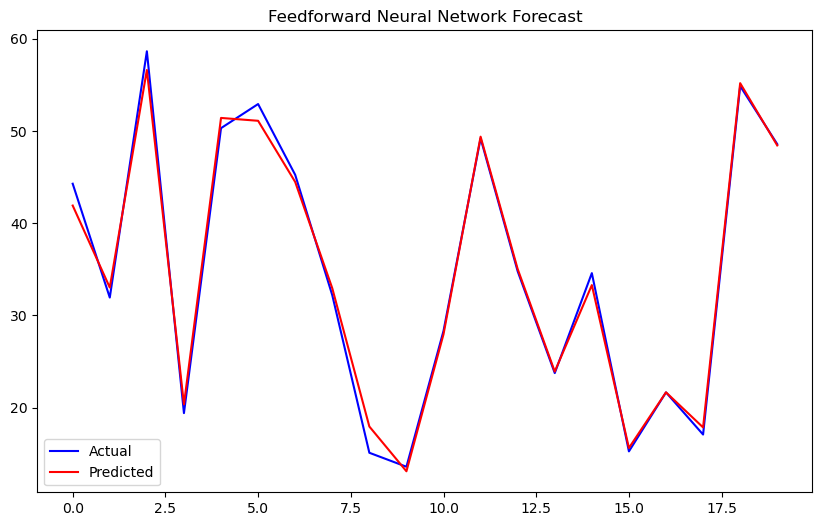

In [8]:

# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color="Blue")
plt.plot(y_pred, label='Predicted', color="Red")
plt.title('Feedforward Neural Network Forecast')
plt.legend()
plt.savefig("NN_forecast.png")
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1255.3970 - val_loss: 1752.3743
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1326.8715 - val_loss: 1714.0519
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1376.1682 - val_loss: 1664.2457
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1319.5155 - val_loss: 1591.3203
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1220.8767 - val_loss: 1482.1401
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1235.0962 - val_loss: 1316.6027
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1015.9306 - val_loss: 1083.3289
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 797.9100 - val_loss: 774.5601
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 548.8885 - val_loss: 432.8945
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 234.5682 - val_loss: 144.1283
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71.3668 - val_loss: 18.1100
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 

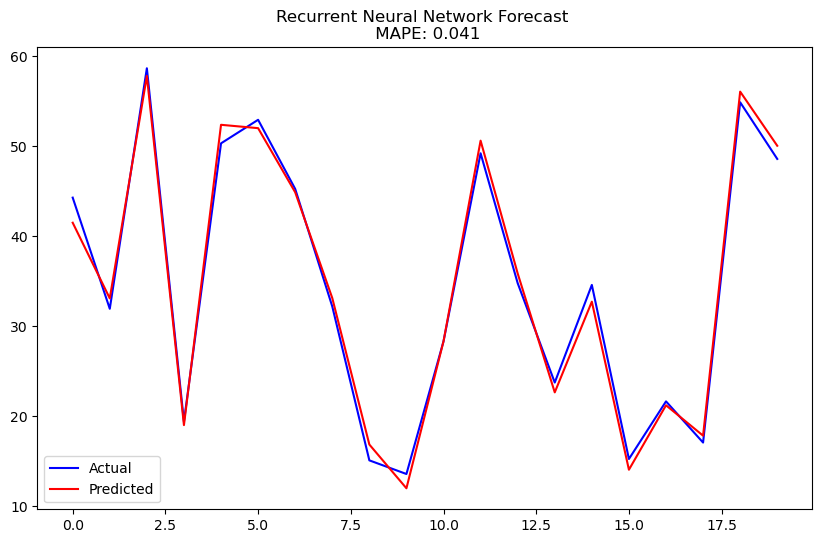

In [32]:
from tensorflow.keras.layers import SimpleRNN

# Build an RNN model
model = tf.keras.Sequential([
    SimpleRNN(50, activation='relu', input_shape=(lag, 1)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Reshape input for RNN (samples, timesteps, features)
X_train_rnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_rnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the model
model.fit(X_train_rnn, y_train, epochs=50, batch_size=8, verbose=1, validation_split=0.1)

# Predict
y_pred_rnn = model.predict(X_test_rnn)
mape = mean_absolute_percentage_error(y_test, y_pred_rnn)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='Blue')
plt.plot(y_pred_rnn, label='Predicted', color='Red')
plt.title(f'Recurrent Neural Network Forecast \n MAPE: {mape:.3f}')
plt.legend()
plt.savefig("RNN_forecast.png")
plt.show()



/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1617.2051 - val_loss: 1797.1284
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1495.1206 - val_loss: 1791.9274
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1359.4312 - val_loss: 1785.7849
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1455.9521 - val_loss: 1777.0464
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1310.3760 - val_loss: 1764.8246
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1418.4387 - val_loss: 1746.6873
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1222.0747 - val_loss: 1718.7944
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1276.7461 - val_loss: 1673.6560
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1317.0581 - val_loss: 1598.4042
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1182.8909 - val_loss: 1468.7152
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1136.8005 - val_loss: 1245.6947
Epoch 12/50
9/9 ━━━━━━━━━━━━━

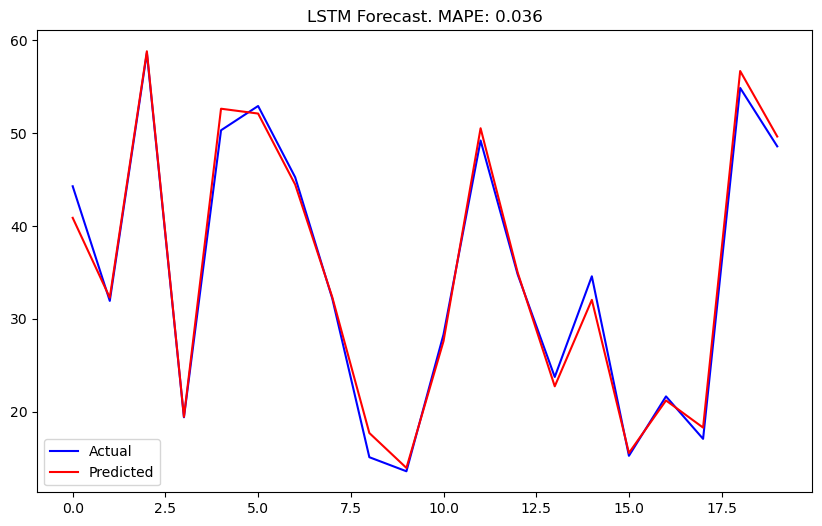

In [30]:
from tensorflow.keras.layers import LSTM

# Build an LSTM model
model = tf.keras.Sequential([
    LSTM(50, activation='relu', input_shape=(lag, 1)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the model
model.fit(X_train_rnn, y_train, epochs=50, batch_size=8, verbose=1, validation_split=0.1)

# Predict
y_pred_lstm = model.predict(X_test_rnn)
mape = mean_absolute_percentage_error(y_test, y_pred_lstm)
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='Blue')
plt.plot(y_pred_lstm, label='Predicted', color='Red')
plt.title(f'LSTM Forecast. MAPE: {mape:.3f}')
plt.legend()
plt.savefig("LSTM_forecast.png")
plt.show()

In [22]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [97, 20]